In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Harmonic Oscillator Action ##

Let's consider the action of the (classical) harmonic oscillator as a function of "paths".  Using natural units
$$
  L = \frac{1}{2}\dot{q}^2 + \frac{1}{2}q^2
$$
with equations of motion and classical solution:
$$
  \ddot{q} = -q \quad\Rightarrow\quad q(t)=A\cos t + B\sin t
$$

To discretize the system we will decompose paths, $q(t)$, in a Fourier series:
$$
  q(t) = \sum_n a_n\cos nt + b_n\sin nt
$$
Now we must impose our boundary conditions and "extremize" the action.  Let's start by considering a full oscillation, such that $q(0)=q(2\pi)=1$.  The classical solution is then $a_1=1$ and all other $a_n$ and $b_n$ zero.  The action is $S=S_1-S_2$
In terms of which our action is $S=S_1-S_2$ with
$$
  S_1 = \frac{1}{2}\int_0^{2\pi} dt\ \dot{q}^2
      = \frac{\pi}{2}\sum_{n=1}^\infty n^2\left( a_n^2 + b_n^2 \right)
$$
and
$$
  S_2 = \frac{1}{2}\int_0^{2\pi} dt\ q^2
      = \pi a_0^2 + \frac{\pi}{2}\sum_{n=1}^\infty \left( a_n^2 + b_n^2 \right)
$$
or
$$
  S = S_1 - S_2 = \frac{\pi}{2}\sum_{n=2}^\infty (n^2-1)(a_n^2+b_n^2) - \pi a_0^2
  \quad\mathrm{with}\quad a_0 = 1 - \sum_{n=1}^\infty a_n
$$

Let's work in a subspace where only $a_0$, $a_1$ and $b_1$ are non-zero, i.e. we're considering a 2D slice through our (infinite dimensional) space of paths:
$$
  q(t) = (1-a_1) + a_1\cos t + b_1\sin t
$$
In this subspace
$$
  S = S_1 - S_2 = -\pi (1-a_1)^2
$$
so along this slice the action is _maximized_ at the classical solution ($a_1=1$) and completely flat in the $b_1$ direction (i.e. it is a degenerate limit of a saddle or maximum).

What about the subspace with $b_n\equiv 0$ and only $a_0$, $a_1$ and $a_2$ non-zero?  Now we have
$$
  S = S_1 - S_2 = \frac{3\pi}{2} a_2^2 - \pi(1-a_1-a_2)^2
$$
which has a saddle point at $a_1=1$, $a_0=a_2=0$.  A little thought will show you that if we were to open up the space, $S$ is convex in the other $a_n$ and $b_n$ directions except for $b_1$ which doesn't enter $S$.

In [2]:
# Let's plot the action on a grid of a_1-a_2:
a1vals = np.linspace( 0.5,1.5,25)
a2vals = np.linspace(-0.5,0.5,25)
A1,A2  = np.meshgrid(a1vals,a2vals,indexing='ij')
A0     = 1-A1-A2

Text(0.5, 1.0, 'Action')

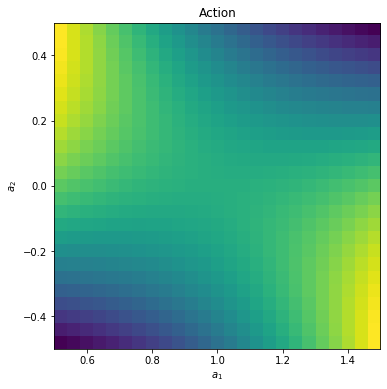

In [3]:
S1 = np.pi/2*( A1**2 + 4*A2**2 )
S2 = np.pi*A0**2 + np.pi/2*(A1**2+A2**2)
SS = S1 - S2
#
fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.imshow(SS,origin='lower',\
          extent=[a1vals[0],a1vals[-1],a2vals[0],a2vals[-1]])
ax.set_xlabel(r'$a_1$')
ax.set_ylabel(r'$a_2$')
ax.set_title('Action')

#### Changing the limits ####

What if we don't consider a full oscillation, but a shorter period of time?  Suppose for example we took $q(0)=1$ as before but now $q(0.1)=\cos(0.1)\simeq 0.995$?  This has the same classical solution, $q(t)=\cos t$, but now $S_1$ and $S_2$ are more complicated and both boundary conditions give constraints on the $a_n$ and $b_n$.  If you look at the slice $b_n\equiv 0$ for all $n$, what does the action look like near the classical path? 